In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return " ".join(result)+" "

In [11]:
def process(df):  
  processed_docs = df['TITLE']+" "+df['DESCRIPTION']+" "+df['BULLET_POINTS']+" "+df['BRAND']
  return processed_docs.astype(str).map(preprocess)

In [39]:
chunksize = (10 ** 5)
total_size = 110775	
total_chunks = total_size//chunksize + 1
threshold = (total_chunks*2)//3
print("Chunk Size:",chunksize)
print("Total Size:",total_size)
print("Total Chunks:",total_chunks)
print("Threshold:", threshold)
print("_________________________________________________")

filename = "/content/gdrive/MyDrive/AmazonMLChallenge/train.csv"
cols=["DOCUMENT","TARGET"]
chunk_number=0
for chunk in pd.read_csv(filename, chunksize=chunksize, escapechar = "\\", na_values='' ,quoting = csv.QUOTE_NONE):
  chunk_number+=1 
  chunk.fillna(" ",inplace=True)
  print("Processing Chunk:",chunk_number)
  processed_chunk = pd.DataFrame()  
  processed_chunk["DOCUMENT"] = process(chunk) 
  processed_chunk["TARGET"] = chunk['BROWSE_NODE_ID']
  if chunk_number<=threshold:  
    if chunk_number==1:
      processed_chunk.to_csv('/content/gdrive/MyDrive/AmazonMLChallenge/processed_train.csv')
    else:
      processed_chunk.to_csv('/content/gdrive/MyDrive/AmazonMLChallenge/processed_train.csv', mode='a', header=False)    
  else:
    if chunk_number==(threshold+1):
      processed_chunk.to_csv('/content/gdrive/MyDrive/AmazonMLChallenge/processed_test.csv')
    else:
      processed_chunk.to_csv('/content/gdrive/MyDrive/AmazonMLChallenge/processed_test.csv', mode='a', header=False) 
    



  

Chunk Size: 100000
Total Size: 2902953
Total Chunks: 30
Threshold: 20
_________________________________________________
Processing Chunk: 1
Processing Chunk: 2
Processing Chunk: 3
Processing Chunk: 4
Processing Chunk: 5
Processing Chunk: 6
Processing Chunk: 7
Processing Chunk: 8
Processing Chunk: 9
Processing Chunk: 10
Processing Chunk: 11
Processing Chunk: 12
Processing Chunk: 13
Processing Chunk: 14
Processing Chunk: 15
Processing Chunk: 16
Processing Chunk: 17
Processing Chunk: 18
Processing Chunk: 19
Processing Chunk: 20
Processing Chunk: 21
Processing Chunk: 22
Processing Chunk: 23
Processing Chunk: 24
Processing Chunk: 25
Processing Chunk: 26
Processing Chunk: 27
Processing Chunk: 28
Processing Chunk: 29
Processing Chunk: 30


## Exploratory Data Analysis

In [ ]:
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath,encoding="utf8") as f:
        for val in zip(f.readlines(),range(10000)):
            val = val.replace("\,",";")
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [8]:



df = pd.read_csv('/content/gdrive/MyDrive/AmazonMLChallenge/train.csv', escapechar = "\\", quoting = csv.QUOTE_NONE)


In [ ]:
df.head(5)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4


In [ ]:
df.describe(include=np.object)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
count,2902953,2179360,2736761,2846287
unique,2751512,1278942,1668898,258265
top,ZEBRA BLINDS Polyester Curtain for Windows Or ...,Shengshou back covers are the best attractive ...,[OUT OF THE BOX DESIGNS & VIBRANT PRINT : Our ...,Generic
freq,163,5475,4351,107303


In [ ]:
df['SLNO']=[i for i in range(len(df))]

In [ ]:
browse_nodes=df.groupby('BROWSE_NODE_ID').count().sort_values(by='SLNO',ascending=False)


,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,SLNO
BROWSE_NODE_ID,,,,,
1045,215698,209563,214798,215250,215698
5,70317,45077,68777,70284,70318
1251,51929,30167,50902,51915,51929
1052,45553,38283,44282,45552,45553
4,34168,13882,12501,16567,34177
1295,32040,31250,31850,31971,32040
1024,31961,11052,31449,31959,31961
374,31896,30244,31208,31620,31896
773,25898,16653,25490,25886,25899


In [ ]:
sum(browse_nodes['SLNO'][])

550197

<BarContainer object of 50 artists>

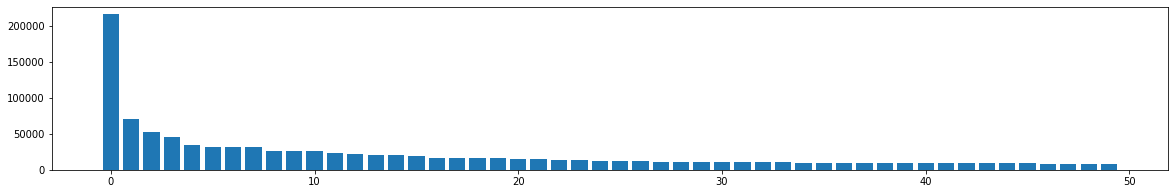

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
#browse_nodes.index.values[:50]
plt.bar(list(range(50)),browse_nodes['SLNO'][:50])

In [ ]:
df_test = pd.read_csv('/content/gdrive/MyDrive/AmazonMLChallenge/test.csv', escapechar = "\\", quoting = csv.QUOTE_NONE)


In [ ]:
df_test.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero


## LDA - Latent Dirichlet Allocation
### Topic Modelling

In [15]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
df_train.drop(['PREPROCESSED_TITLE'],axis=1,inplace=True)
df_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
219892,Men in Black Men's Blended Unstitched Shirt an...,This is a combo pack containing 3 pair of suit...,"[Material Type: Blended,Colour: Multi-Colour,L...",Men in Black,5022
1615029,trendnet Micro n150 Wireless & Bluetooth 4.0 U...,"Provides Bluetooth and WiFi Connections, allow...",TRENDnet TBW-108UB IEEE 802.11n - Wi-Fi/Blueto...,TRENDnet,487
744110,Fake Note Detector 1,Fake note detector 1,Body : Metal ( Heavyduty Indian )Water mark De...,alpha,10385
2464986,Zivite Full Body 3-in-1 Slim Fit (Red-Black-Re...,"Premium Design Beautiful design, elegant appea...",[COMPATIBLITY: Compatible / Suitable Only for ...,zivite,1045
2808183,Tanishka SHIVAY SALES Polyester Black Messenge...,"Messenger bag with laptop compartment in it, f...","[Messenger bag with laptop compartment in it, ...",Tanishka,2093


In [18]:
def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
df_train.head()

In [ ]:
dictionary = gensim.corpora.Dictionary(df['TOKENS'])
print(dictionary)

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['TOKENS']]

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df_train['TOKENS'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
def compute_coherence_values(corpus, dictionary, k,preproc):
    lda_model_tfidf = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary, passes=2, workers=4)                                           
    coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=preproc, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('n = ' ,k)
    print('Coherence Score: ', coherence_lda)
    return coherence_lda

In [ ]:
i=10
y=[]
x =[]
while(i<=10**4):
  yy =compute_coherence_values(corpus_tfidf, dictionary, i,processed_docs)
  x.append(i)
  y.append(yy)
  i+=500

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(x, y, label = "line 1") 
plt.xlabel('num_topics') 
# naming the y axis 
plt.ylabel('cv_score') 
plt.title('CV_Score')